In [33]:
import numpy as np
np.random.seed(1337)
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from keras.optimizers import SGD, Adam
from keras.models import load_model

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('edited_ratings_subset_200x1000.csv')
df = pd.DataFrame(df)

In [10]:
# np.array(list(set(df.movie_idx.values))).shape
#np.array(list(set(df.userId.values))).shape

In [45]:
df = shuffle(df)

In [62]:
N = df.userId.max() + 1
M = df.movie_idx.max() + 1
(N,M)

(200, 1000)

In [12]:
#Matrix Factorization

In [63]:
cutoff = int(0.8*len(df))
ratings_train = df.iloc[:cutoff]
ratings_test = df.iloc[cutoff:]

In [64]:
K = 10
#K = 3
mu = ratings_train.rating.mean()
epochs=50
#reg = 0.001
#reg = 0.0005
reg = 0
u = Input(shape = (1,))
m = Input(shape = (1,))
u_embedding = Embedding(N,K,embeddings_regularizer = l2(reg))(u)
m_embedding = Embedding(M,K,embeddings_regularizer = l2(reg))(m)

u_bias = Embedding(N,1,embeddings_regularizer = l2(reg))(u)
m_bias = Embedding(M,1,embeddings_regularizer = l2(reg))(m)
x = Dot(axes = 2)([u_embedding,m_embedding])

x = Add()([x, u_bias, m_bias])
x = Flatten()(x)

model = Model(inputs = [u, m], output = x)

In [65]:
model.compile(
loss = 'mse',
optimizer = SGD(lr = 0.0000001, momentum = 0.9),
#optimizer = 'adam',
#optimizer = SGD(lr = 0.009),
metrics = ['mse']
)

In [66]:
r = model.fit(
    x = [ratings_train.userId.values, ratings_train.movie_idx.values],
    y = ratings_train.rating.values - mu,
    epochs = epochs,
    batch_size = 64,
    validation_data = (
        [ratings_test.userId.values, ratings_test.movie_idx.values],
        ratings_test.rating.values - mu
    ),
    shuffle = False
)

Train on 35377 samples, validate on 8845 samples
Epoch 1/50
35377/35377 [==============================] - 2s 46us/step - loss: 0.9565 - mean_squared_error: 0.9565 - val_loss: 0.9684 - val_mean_squared_error: 0.9684
Epoch 2/50
35377/35377 [==============================] - 1s 31us/step - loss: 0.9565 - mean_squared_error: 0.9565 - val_loss: 0.9684 - val_mean_squared_error: 0.9684
Epoch 3/50
35377/35377 [==============================] - 1s 34us/step - loss: 0.9565 - mean_squared_error: 0.9565 - val_loss: 0.9684 - val_mean_squared_error: 0.9684
Epoch 4/50
35377/35377 [==============================] - 1s 34us/step - loss: 0.9565 - mean_squared_error: 0.9565 - val_loss: 0.9684 - val_mean_squared_error: 0.9684
Epoch 5/50
35377/35377 [==============================] - 1s 31us/step - loss: 0.9564 - mean_squared_error: 0.9564 - val_loss: 0.9684 - val_mean_squared_error: 0.9684
Epoch 6/50
35377/35377 [==============================] - 1s 31us/step - loss: 0.9564 - mean_squared_error: 0.9564 -

35377/35377 [==============================] - 1s 32us/step - loss: 0.9563 - mean_squared_error: 0.9563 - val_loss: 0.9684 - val_mean_squared_error: 0.9684
Epoch 50/50
35377/35377 [==============================] - 1s 32us/step - loss: 0.9563 - mean_squared_error: 0.9563 - val_loss: 0.9684 - val_mean_squared_error: 0.9684


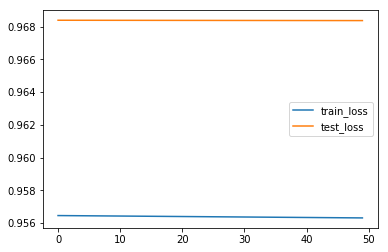

In [67]:
plt.plot(r.history['loss'],label = "train_loss")
plt.plot(r.history['val_loss'],label = "test_loss")
plt.legend()
plt.show()

In [68]:
model.save('MF_large_shf.h5')